# radius

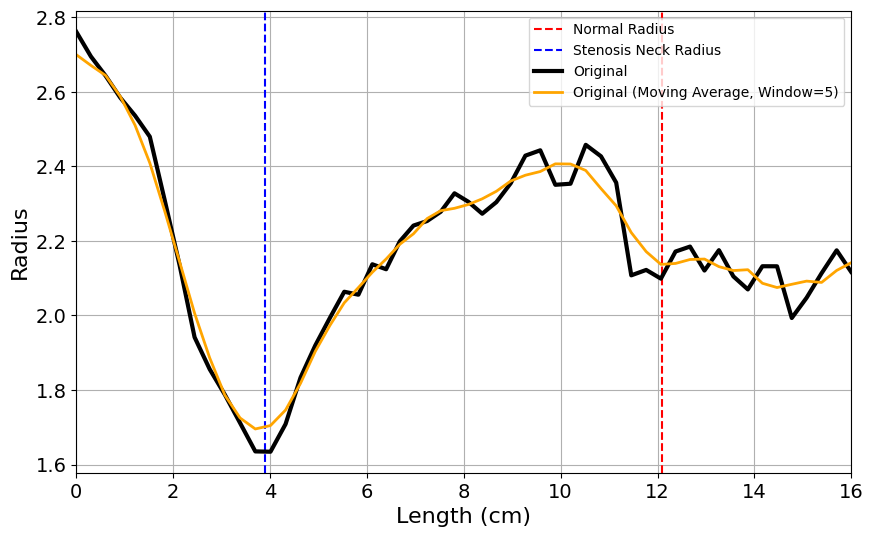

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract CB0 radius and length data
cb0_radius = data['radius_0']
cb0_length = data['length_0']

# Apply moving average smoothing (once) and handle edge cases
window_size = 5  # Define the moving average window size
cb0_radius_smoothed = cb0_radius.rolling(window=window_size, center=True, min_periods=1).mean()

# Plot the original data and smoothed data on the same figure
plt.figure(figsize=(10, 6))

plt.axvline(x=12.1, color='red', linestyle='--', linewidth=1.5, label='Normal Radius')
plt.axvline(x=3.9, color='blue', linestyle='--', linewidth=1.5, label='Stenosis Neck Radius')
plt.plot(cb0_length, cb0_radius, color='black', linewidth=3, label='Original')
plt.plot(cb0_length, cb0_radius_smoothed, color='orange', linewidth=2, label=f'Original (Moving Average, Window={window_size})')
#plt.title('CB0 Radius: Original and Smoothed Data', fontsize=14)
plt.xlabel('Length (cm)', fontsize=16)
plt.ylabel('Radius', fontsize=16)
plt.xlim(0, 16)  # Limit x-axis range
plt.legend(fontsize=10, loc='upper right')
plt.tick_params(axis='both', labelsize=14) 
plt.grid(True)
plt.show()


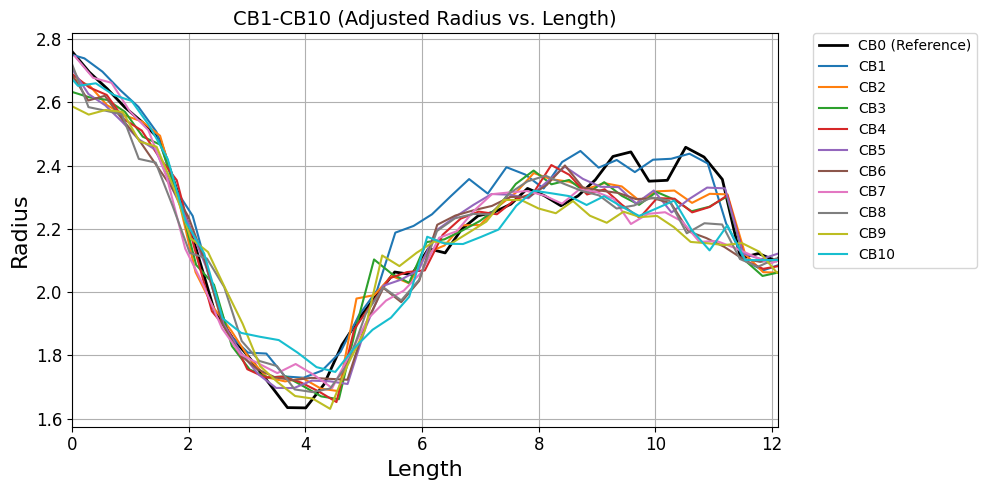

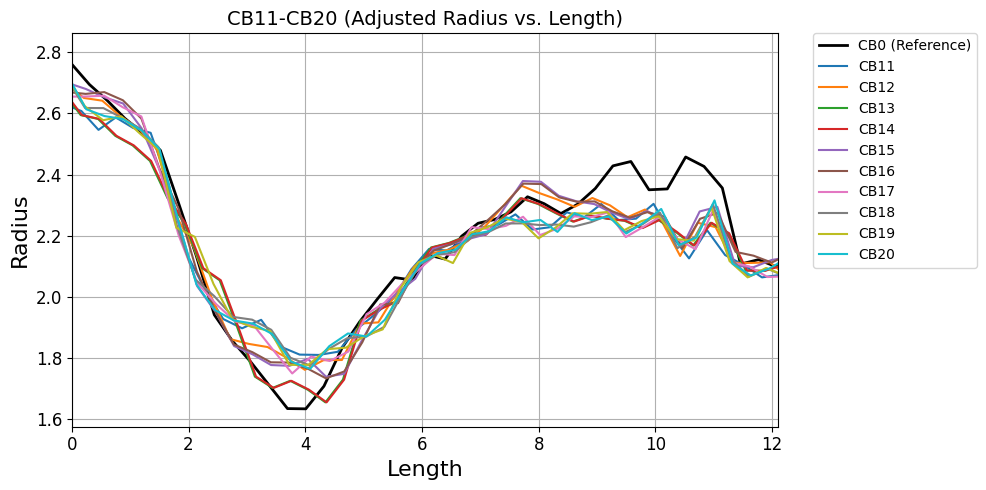

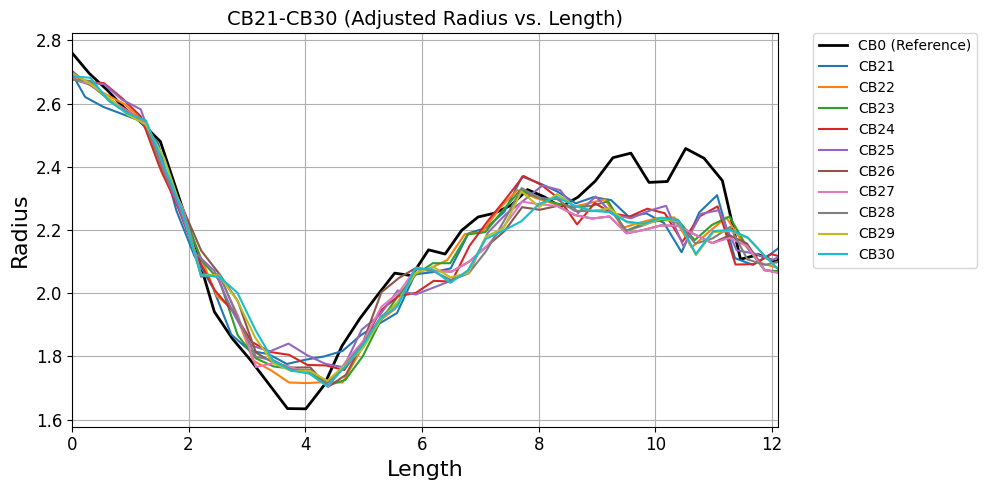

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Define reference data (CB0)
reference_radius = latest_sheet_data['radius_0']
reference_length = latest_sheet_data['length_0']

# Offsets for length adjustment
offsets = {
    "radius_1": -0.4, "radius_2": 0, "radius_3": 0, "radius_4": 0, "radius_5": 0,
    "radius_6": 0, "radius_7": 0.05, "radius_8": 0, "radius_9": 0, "radius_10": -0.2,
    "radius_11": -0.42, "radius_12": -0.42, "radius_13": -0.44, "radius_14": -0.42,
    "radius_15": -0.4, "radius_16": -0.4, "radius_17": -0.4, "radius_18": -0.4,
    "radius_19": -0.4, "radius_20": -0.38, "radius_21": -0.4, "radius_22": -0.05,
    "radius_23": 0, "radius_24": -0.4, "radius_25": -0.4, "radius_26": 0,
    "radius_27": 0, "radius_28": 0, "radius_29": 0, "radius_30": 0
}

# Function to plot a range of CB models
def plot_cb_models(start, end, title):
    plt.figure(figsize=(10, 5))

    # Plot CB0 as the reference
    plt.plot(reference_length, reference_radius, label='CB0 (Reference)', color='black', linewidth=2)

    # Plot specified CB models
    for i in range(start, end + 1):
        col_radius = f'radius_{i}'
        col_length = f'length_{i}'
        if col_radius in latest_sheet_data.columns and col_length in latest_sheet_data.columns:
            adjusted_length = latest_sheet_data[col_length] + offsets.get(col_radius, 0)
            plt.plot(adjusted_length, latest_sheet_data[col_radius], label=f'CB{i}')

    # Format plot
    plt.title(title, fontsize=14)
    plt.xlabel('Length', fontsize=16)
    plt.xlim(0, 12.1)
    plt.ylabel('Radius', fontsize=16)
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tick_params(axis='both', labelsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot CB1-CB10
plot_cb_models(1, 10, 'CB1-CB10 (Adjusted Radius vs. Length)')

# Plot CB11-CB20
plot_cb_models(11, 20, 'CB11-CB20 (Adjusted Radius vs. Length)')

# Plot CB21-CB30
plot_cb_models(21, 30, 'CB21-CB30 (Adjusted Radius vs. Length)')


Adjusted and resampled data saved to adjusted_centerline_data.xlsx


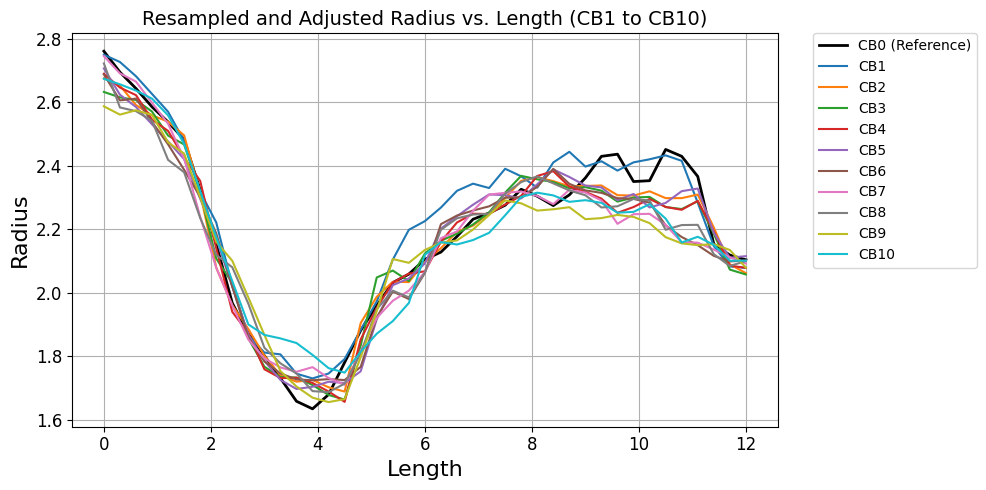

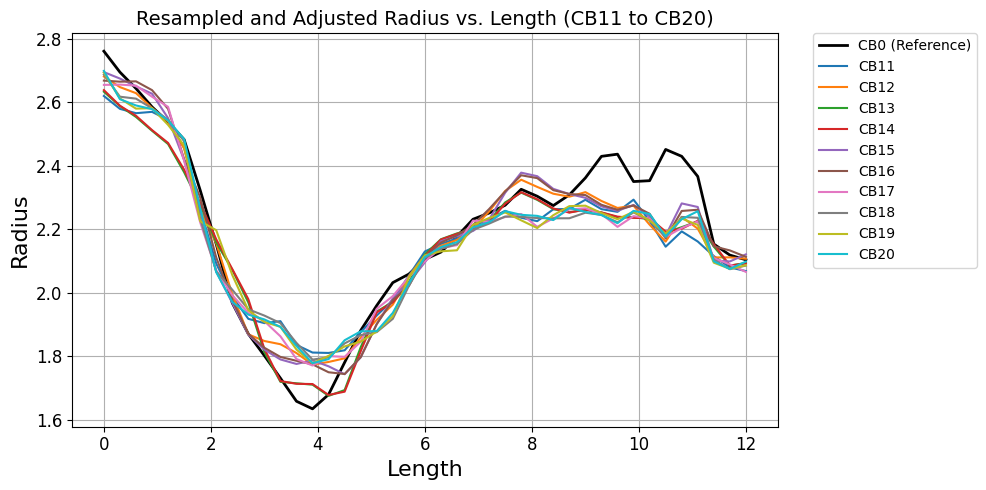

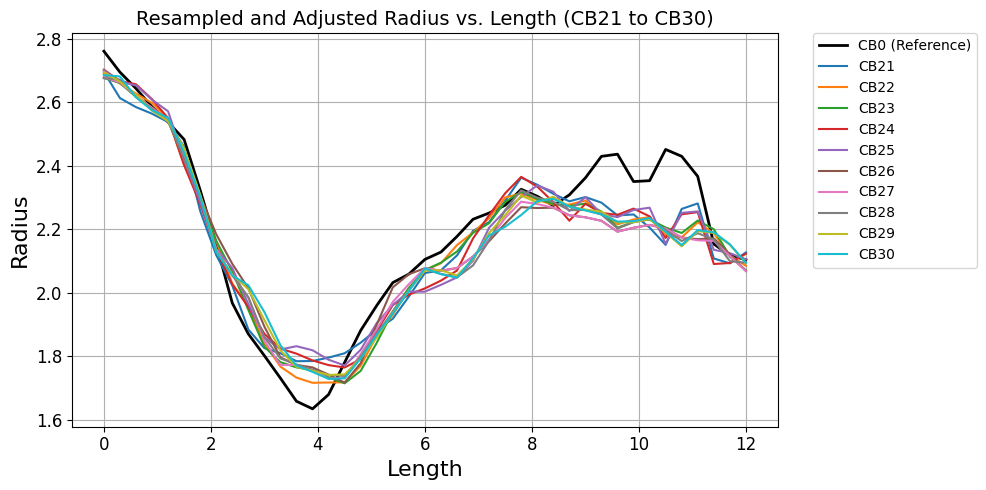

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Define reference data (CB0)
reference_radius = latest_sheet_data['radius_0']
reference_length = latest_sheet_data['length_0']

# Offsets for length adjustment
offsets = {
    "radius_1": -0.4, "radius_2": 0, "radius_3": 0, "radius_4": 0, "radius_5": 0,
    "radius_6": 0, "radius_7": 0.05, "radius_8": 0, "radius_9": 0, "radius_10": -0.2,
    "radius_11": -0.42, "radius_12": -0.42, "radius_13": -0.44, "radius_14": -0.42,
    "radius_15": -0.4, "radius_16": -0.4, "radius_17": -0.4, "radius_18": -0.4,
    "radius_19": -0.4, "radius_20": -0.38, "radius_21": -0.4, "radius_22": -0.05,
    "radius_23": 0, "radius_24": -0.4, "radius_25": -0.4, "radius_26": 0,
    "radius_27": 0, "radius_28": 0, "radius_29": 0, "radius_30": 0
}

# Define sampling interval
sample_interval = 0.3
sample_length = np.arange(0, 12.1, sample_interval)

# Store adjusted and resampled data
adjusted_data = {}

# Process CB0 (reference model)
adjusted_data['Length'] = sample_length
adjusted_data['CB0'] = np.interp(sample_length, reference_length, reference_radius)

# Process CB1 to CB30
for i in range(1, 31):
    col_radius = f'radius_{i}'
    col_length = f'length_{i}'
    if col_radius in latest_sheet_data.columns and col_length in latest_sheet_data.columns:
        # Adjust length and retrieve radius
        adjusted_length = latest_sheet_data[col_length] + offsets.get(col_radius, 0)
        adjusted_radius = latest_sheet_data[col_radius]

        # Resample radius
        resampled_radius = np.interp(sample_length, adjusted_length, adjusted_radius)

        # Save to adjusted_data
        adjusted_data[f'CB{i}'] = resampled_radius

# Convert to DataFrame
result_df = pd.DataFrame(adjusted_data)

# Save to Excel file
output_file = 'adjusted_centerline_data.xlsx'
result_df.to_excel(output_file, index=False)
print(f'Adjusted and resampled data saved to {output_file}')

# Visualization: CB1-CB10
plt.figure(figsize=(10, 5))
plt.plot(sample_length, adjusted_data['CB0'], label='CB0 (Reference)', linewidth=2, color='black')
for i in range(1, 11):
    if f'CB{i}' in adjusted_data:
        plt.plot(sample_length, adjusted_data[f'CB{i}'], label=f'CB{i}')
plt.title('Resampled and Adjusted Radius vs. Length (CB1 to CB10)', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

# Visualization: CB11-CB20
plt.figure(figsize=(10, 5))
plt.plot(sample_length, adjusted_data['CB0'], label='CB0 (Reference)', linewidth=2, color='black')
for i in range(11, 21):
    if f'CB{i}' in adjusted_data:
        plt.plot(sample_length, adjusted_data[f'CB{i}'], label=f'CB{i}')
plt.title('Resampled and Adjusted Radius vs. Length (CB11 to CB20)', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

# Visualization: CB21-CB30
plt.figure(figsize=(10, 5))
plt.plot(sample_length, adjusted_data['CB0'], label='CB0 (Reference)', linewidth=2, color='black')
for i in range(21, 31):
    if f'CB{i}' in adjusted_data:
        plt.plot(sample_length, adjusted_data[f'CB{i}'], label=f'CB{i}')
plt.title('Resampled and Adjusted Radius vs. Length (CB21 to CB30)', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


MSE comparison results (Length 0-8) saved to mse_comparison_results_0_8.xlsx


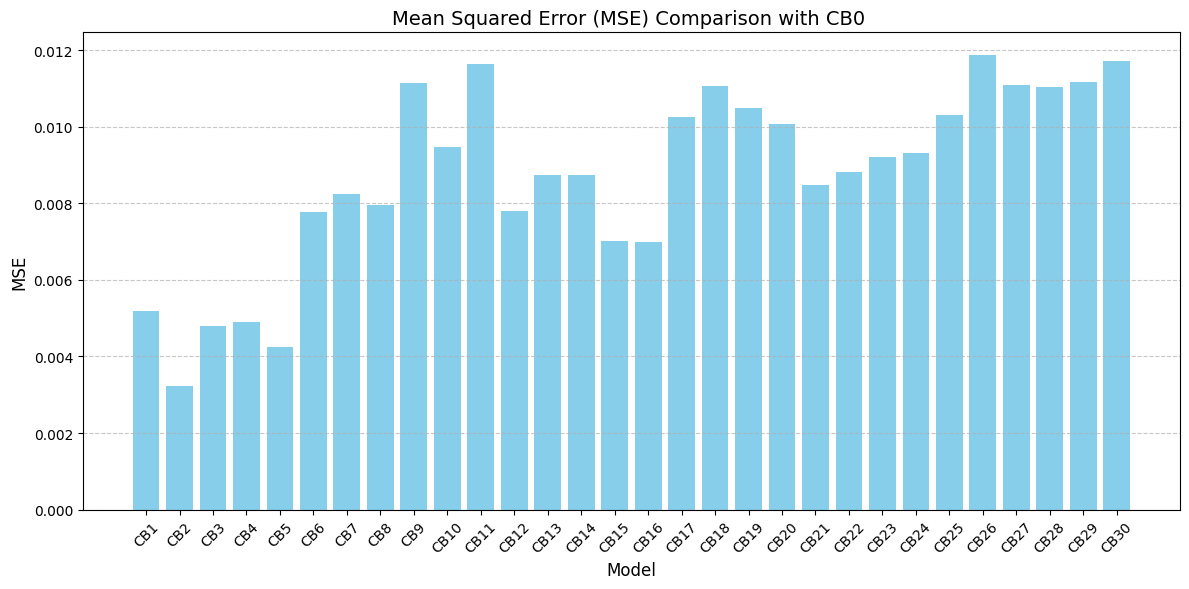

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the adjusted and resampled data
input_file = 'adjusted_centerline_data.xlsx'
data = pd.read_excel(input_file)

# Extract reference data (CB0) and restrict to Length 0-8
valid_range = data['Length'] <= 12.1
reference_data = data.loc[valid_range, 'CB0']

# Compute mean squared error (MSE) for each model compared to CB0 within Length 0-8
mse_results = {}
for column in data.columns[2:]:  # Skip 'Length' and 'CB0'
    model_data = data.loc[valid_range, column]
    mse = mean_squared_error(reference_data, model_data)
    mse_results[column] = mse

# Convert MSE results to DataFrame for visualization
mse_df = pd.DataFrame(list(mse_results.items()), columns=['Model', 'MSE'])

# Save MSE results to Excel
output_file = 'mse_comparison_results_0_8.xlsx'
mse_df.to_excel(output_file, index=False)
print(f'MSE comparison results (Length 0-8) saved to {output_file}')

# Visualize the MSE results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(mse_df['Model'], mse_df['MSE'], color='skyblue')
plt.title('Mean Squared Error (MSE) Comparison with CB0 ', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Point-wise slope differences (Length 0-8) saved to pointwise_slope_differences_0_8.xlsx


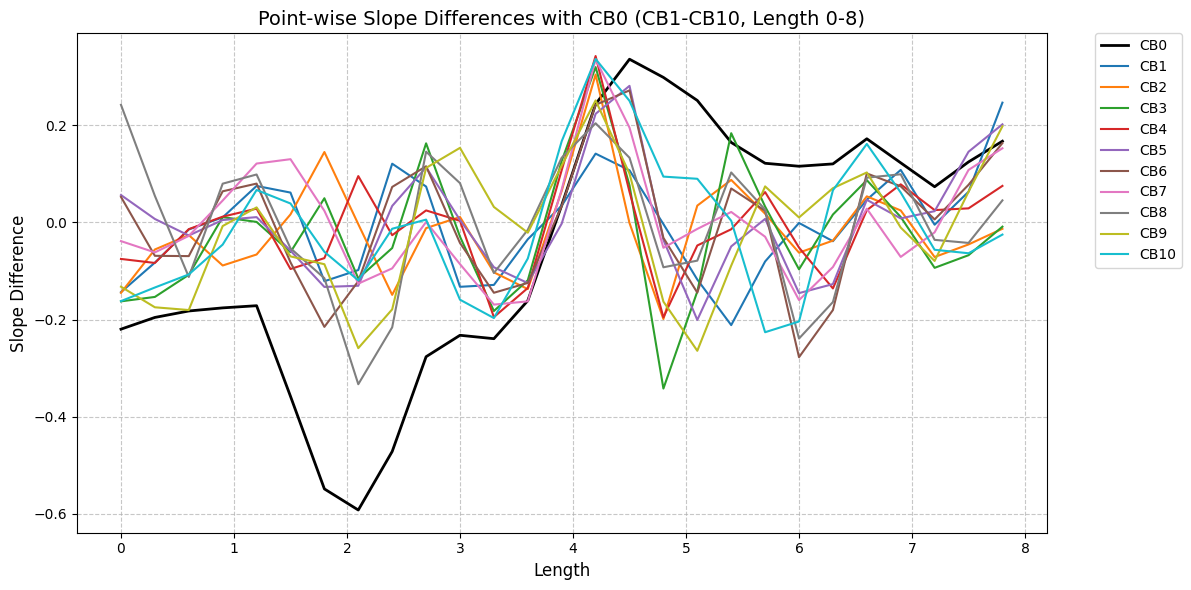

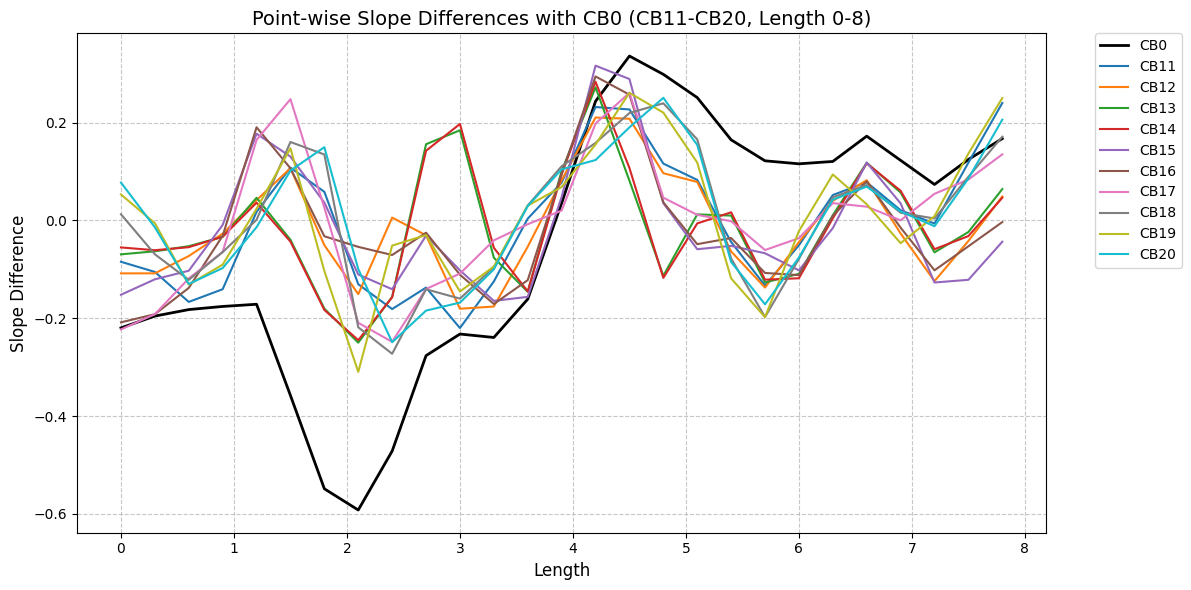

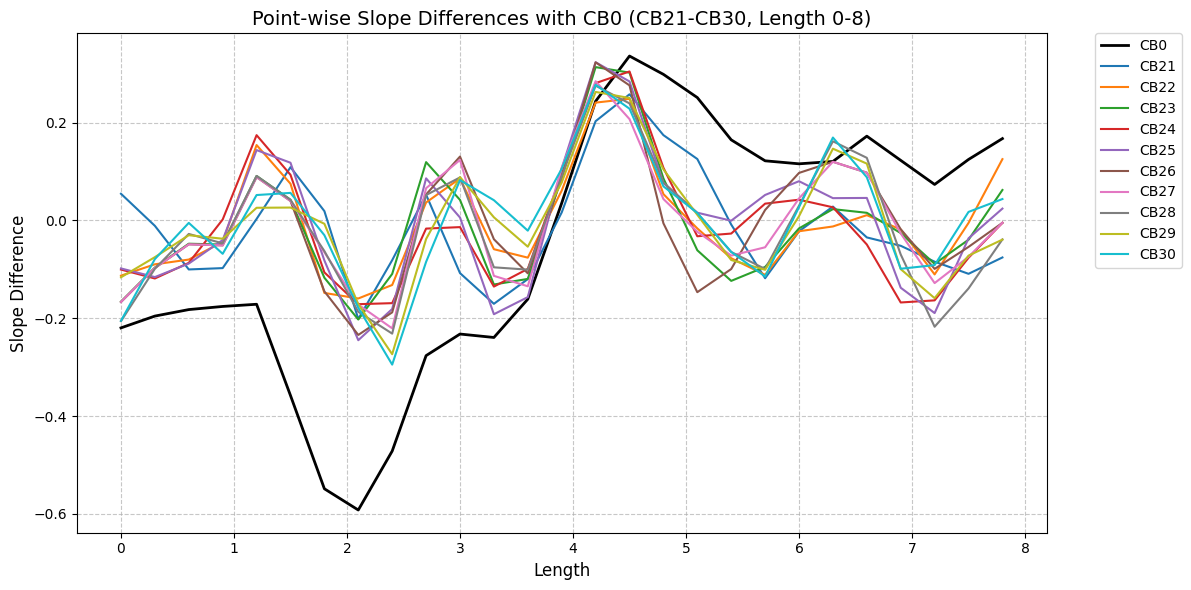

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the adjusted and resampled data
input_file = 'adjusted_centerline_data.xlsx'
data = pd.read_excel(input_file)

# Extract reference data (CB0) and restrict to Length 0-8
valid_range = data['Length'] <= 8
reference_data = data.loc[valid_range, 'CB0']
length_data = data.loc[valid_range, 'Length']

# Compute point-wise slope differences for each model compared to CB0
slope_diff_results = {}
cb0_slope = np.gradient(reference_data, length_data)
for column in data.columns[2:]:  # Skip 'Length' and 'CB0'
    model_data = data.loc[valid_range, column]
    model_slope = np.gradient(model_data, length_data)
    slope_diff_results[column] = cb0_slope - model_slope  # Point-wise slope difference

# Combine slope differences into a DataFrame
slope_diff_df = pd.DataFrame(slope_diff_results)
slope_diff_df.insert(0, 'Length', length_data.reset_index(drop=True))

# Save point-wise slope differences to Excel
output_file = 'pointwise_slope_differences_0_8.xlsx'
slope_diff_df.to_excel(output_file, index=False)
print(f'Point-wise slope differences (Length 0-8) saved to {output_file}')

# Visualize point-wise slope differences
import matplotlib.pyplot as plt

# Visualization for CB1-CB10
plt.figure(figsize=(12, 6))
plt.plot(length_data, cb0_slope, label='CB0', linewidth=2, color='black')  # Add CB0 prominently
for column in slope_diff_df.columns[1:11]:  # CB1 to CB10
    plt.plot(slope_diff_df['Length'], slope_diff_df[column], label=column)
plt.title('Point-wise Slope Differences with CB0 (CB1-CB10, Length 0-8)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Slope Difference', fontsize=12)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization for CB11-CB20
plt.figure(figsize=(12, 6))
plt.plot(length_data, cb0_slope, label='CB0', linewidth=2, color='black')  # Add CB0 prominently
for column in slope_diff_df.columns[11:21]:  # CB11 to CB20
    plt.plot(slope_diff_df['Length'], slope_diff_df[column], label=column)
plt.title('Point-wise Slope Differences with CB0 (CB11-CB20, Length 0-8)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Slope Difference', fontsize=12)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization for CB21-CB30
plt.figure(figsize=(12, 6))
plt.plot(length_data, cb0_slope, label='CB0', linewidth=2, color='black')  # Add CB0 prominently
for column in slope_diff_df.columns[21:31]:  # CB21 to CB30
    plt.plot(slope_diff_df['Length'], slope_diff_df[column], label=column)
plt.title('Point-wise Slope Differences with CB0 (CB21-CB30, Length 0-8)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Slope Difference', fontsize=12)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# RMS

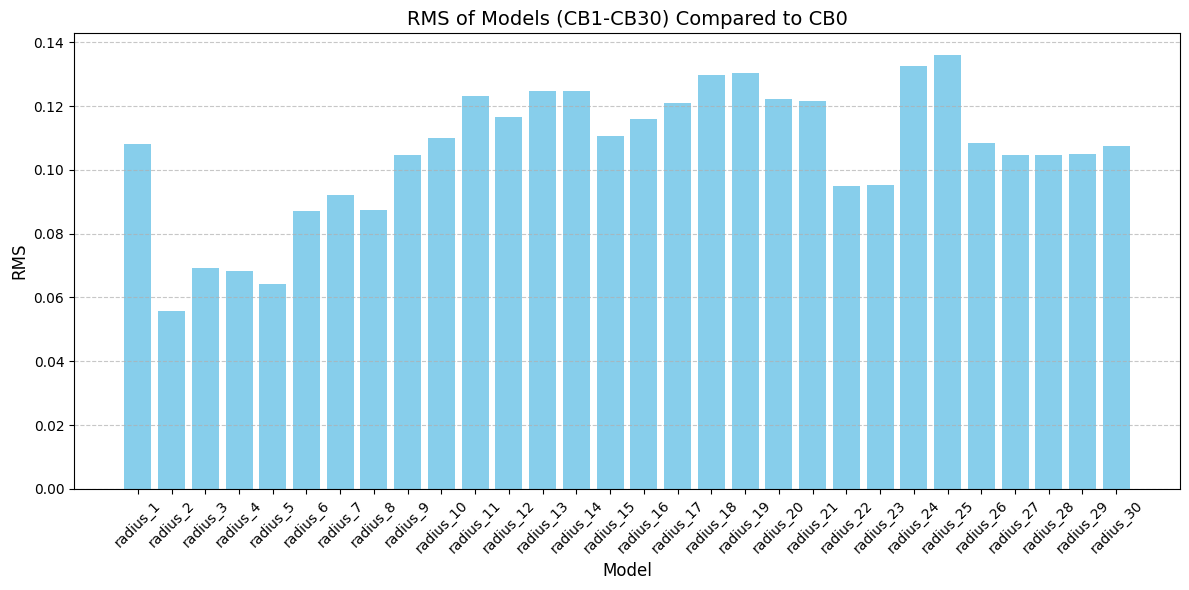

In [50]:
# 绘制 RMS 结果的条形图
import matplotlib.pyplot as plt

models = list(rms_results.keys())
rms_values = list(rms_results.values())

plt.figure(figsize=(12, 6))
plt.bar(models, rms_values, color='skyblue')
plt.title('RMS of Models (CB1-CB30) Compared to CB0', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMS', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Curvature and Torsion

C:\Users\Harujane\AppData\Local\Temp\ipykernel_13564\3645377915.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  curvature_colors = cm.get_cmap('tab20', len(curvature_columns))  # Adjust the number of colors
C:\Users\Harujane\AppData\Local\Temp\ipykernel_13564\3645377915.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  torsion_colors = cm.get_cmap('tab20', len(torsion_columns))


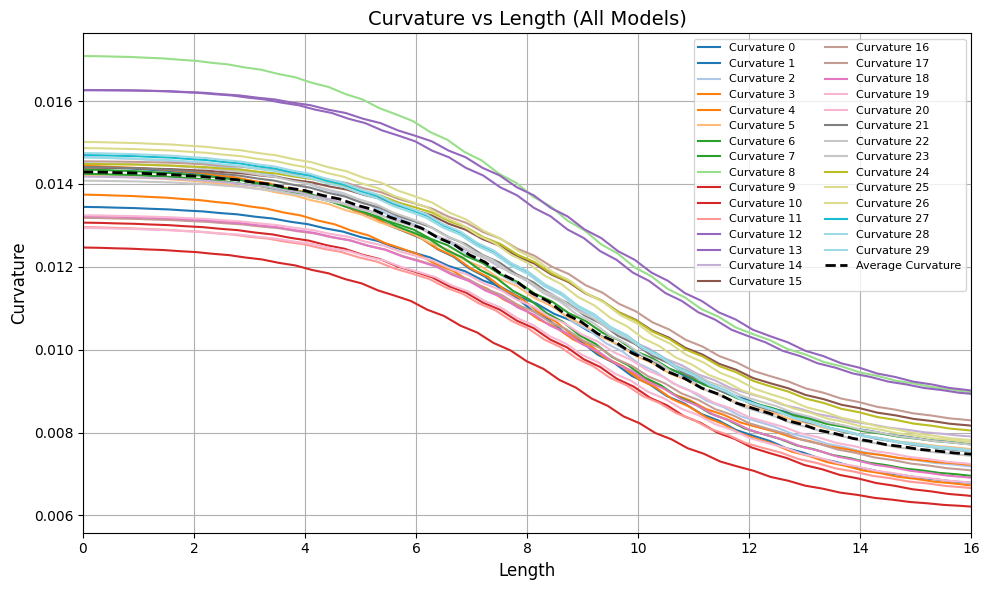

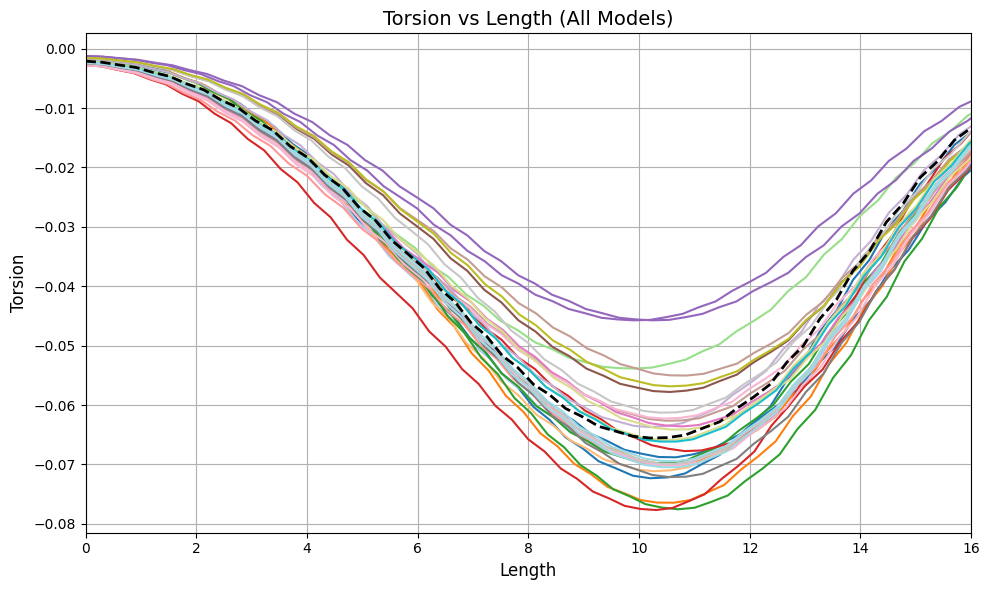

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Extract curvature and torsion columns
curvature_columns = [col for col in latest_sheet_data.columns if 'curvature' in str(col) and col != 'curvature_7']
torsion_columns = [col for col in latest_sheet_data.columns if 'torsion' in str(col) and col != 'torsion_7']

# Define a colormap for unique colors
curvature_colors = cm.get_cmap('tab20', len(curvature_columns))  # Adjust the number of colors
torsion_colors = cm.get_cmap('tab20', len(torsion_columns))

# Plot curvature vs length with unique colors
plt.figure(figsize=(10, 6))
for i, col in enumerate(curvature_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        plt.plot(
            latest_sheet_data[length_col],
            latest_sheet_data[col],
            label=f'Curvature {i}',
            color=curvature_colors(i)
        )

# Calculate and plot the average curvature
curvature_data = [latest_sheet_data[col] for col in curvature_columns if col in latest_sheet_data.columns]
average_curvature = pd.concat(curvature_data, axis=1).mean(axis=1)
average_length = latest_sheet_data[f'length_0']  # Assuming all lengths are aligned
plt.plot(average_length, average_curvature, label='Average Curvature', color='black', linewidth=2, linestyle='--')

plt.title('Curvature vs Length (All Models)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Curvature', fontsize=12)
plt.legend(fontsize=8, loc='upper right', ncol=2)
plt.xlim(0, 16)  # Limit x-axis range
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot torsion vs length with unique colors
plt.figure(figsize=(10, 6))
for i, col in enumerate(torsion_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        plt.plot(
            latest_sheet_data[length_col],
            latest_sheet_data[col],
            label=f'Torsion {i}',
            color=torsion_colors(i)
        )

# Calculate and plot the average torsion
torsion_data = [latest_sheet_data[col] for col in torsion_columns if col in latest_sheet_data.columns]
average_torsion = pd.concat(torsion_data, axis=1).mean(axis=1)
average_length = latest_sheet_data[f'length_0']  # Assuming all lengths are aligned
plt.plot(average_length, average_torsion, label='Average Torsion', color='black', linewidth=2, linestyle='--')

plt.title('Torsion vs Length (All Models)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Torsion', fontsize=12)
plt.xlim(0, 16)  # Limit x-axis range
plt.grid(True)
plt.tight_layout()
plt.show()



Curvature Gradients:
curvature_0 Gradient:
[-3.83565609e-05 -5.26895718e-05 -5.98958901e-05 -7.39961314e-05
 -8.59937756e-05 -1.07597576e-04 -1.24883632e-04 -1.54402002e-04
 -1.76903927e-04 -2.14065875e-04 -2.41903972e-04 -2.88155078e-04
 -3.21762350e-04 -3.76037803e-04 -4.14004743e-04 -4.76176063e-04
 -5.17315356e-04 -5.83725186e-04 -6.25267470e-04 -5.44798630e-04
 -7.33189279e-04 -7.68351156e-04 -8.16593489e-04 -8.43337317e-04
 -8.77102733e-04 -8.95032987e-04 -9.12060164e-04 -9.19812849e-04
 -9.16779574e-04 -9.10845443e-04 -8.84041049e-04 -8.67439235e-04
 -8.31888313e-04 -8.09022800e-04 -7.68077685e-04 -7.39838661e-04
 -6.95277713e-04 -6.64140373e-04 -6.19034854e-04 -5.85948173e-04
 -4.36666514e-04 -5.02983841e-04 -4.67346285e-04 -4.14861522e-04
 -3.80362451e-04 -3.30844226e-04 -3.00125709e-04 -2.56663483e-04
 -2.30254701e-04 -1.93408556e-04 -1.72019904e-04 -1.43199632e-04
 -1.26733357e-04 -1.05227865e-04 -9.34213389e-05 -7.87229170e-05
 -7.10407952e-05 -6.22180560e-05 -7.17140554e-0

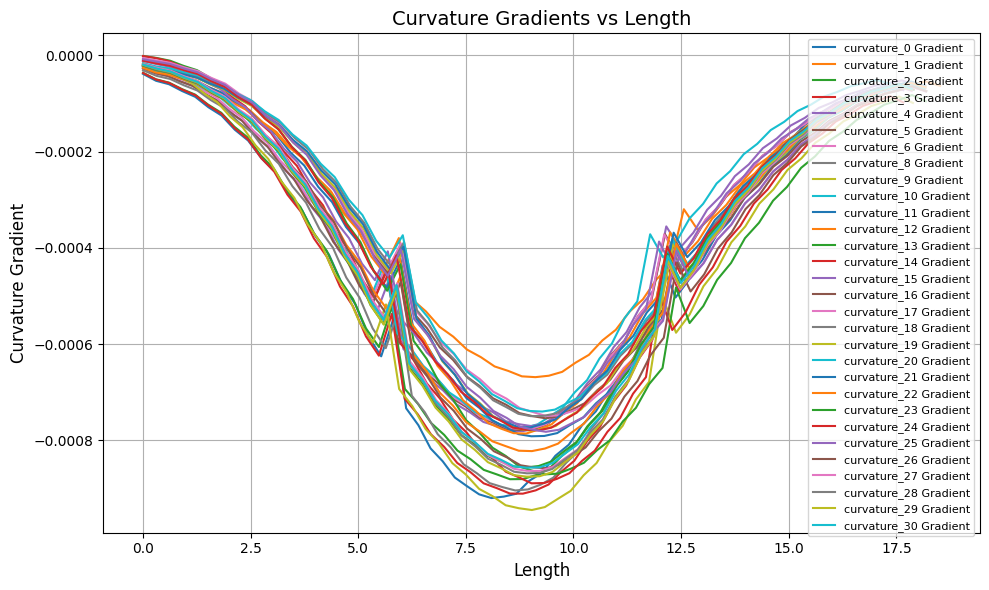

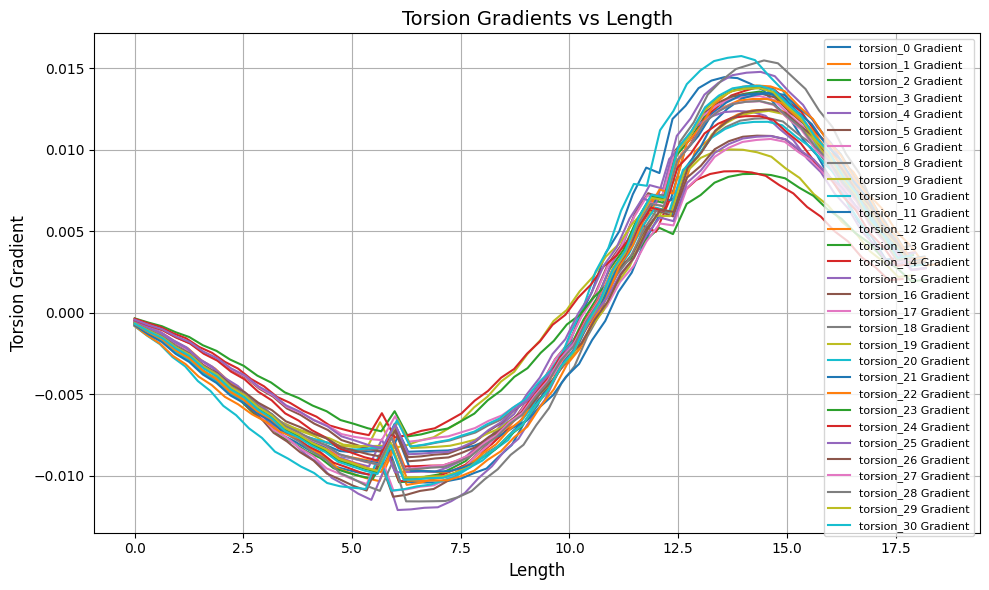

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Extract curvature and torsion columns
curvature_columns = [col for col in latest_sheet_data.columns if 'curvature' in str(col) and col != 'curvature_7']
torsion_columns = [col for col in latest_sheet_data.columns if 'torsion' in str(col) and col != 'torsion_7']

# Calculate gradients for curvature
print("Curvature Gradients:")
for i, col in enumerate(curvature_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        curvature_gradient = np.gradient(latest_sheet_data[col], latest_sheet_data[length_col])
        print(f"{col} Gradient:")
        print(curvature_gradient)

# Calculate gradients for torsion
print("\nTorsion Gradients:")
for i, col in enumerate(torsion_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        torsion_gradient = np.gradient(latest_sheet_data[col], latest_sheet_data[length_col])
        print(f"{col} Gradient:")
        print(torsion_gradient)

# Plot gradients for curvature
plt.figure(figsize=(10, 6))
for i, col in enumerate(curvature_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        curvature_gradient = np.gradient(latest_sheet_data[col], latest_sheet_data[length_col])
        plt.plot(latest_sheet_data[length_col], curvature_gradient, label=f"{col} Gradient")
plt.title('Curvature Gradients vs Length', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Curvature Gradient', fontsize=12)
plt.legend(fontsize=8, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot gradients for torsion
plt.figure(figsize=(10, 6))
for i, col in enumerate(torsion_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        torsion_gradient = np.gradient(latest_sheet_data[col], latest_sheet_data[length_col])
        plt.plot(latest_sheet_data[length_col], torsion_gradient, label=f"{col} Gradient")
plt.title('Torsion Gradients vs Length', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Torsion Gradient', fontsize=12)
plt.legend(fontsize=8, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
